In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [28]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models'
CH = 2

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [29]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_2/   figures/
data_Goose_1st_15s_2/  data_Goose_all_15s_2/  loss_accuracy/
data_Goose_1st_2/      data_Goose_all_2/      model/
data_Goose_1st_5s_1/   data_Goose_all_5s_2/


In [30]:
len(train_loader), len(val_loader), len(test_loader)

(173, 26, 24)

In [31]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180325, rec:004, time:5787.0, label:1.0
date:180327, rec:007, time:5971.0, label:0.0


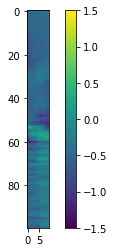

date:180330, rec:008, time:6505.0, label:0.0


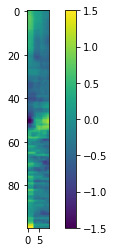

date:180325, rec:009, time:100.0, label:0.0


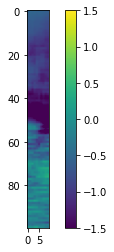

date:180330, rec:008, time:3006.0, label:0.0


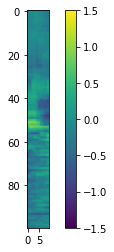

date:180324, rec:008, time:6624.0, label:0.0


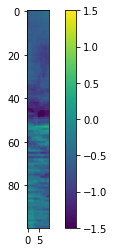

date:180331, rec:007, time:4497.0, label:0.0


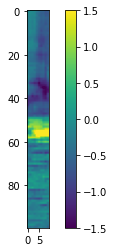

date:180323, rec:002, time:60.0, label:1.0
date:180324, rec:005, time:6925.0, label:1.0
date:180325, rec:001, time:900.0, label:0.0


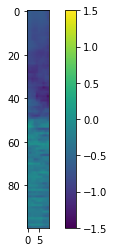

date:180401, rec:001, time:2049.0, label:1.0
date:180322, rec:007, time:4900.0, label:0.0


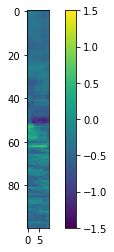

date:180330, rec:009, time:7051.0, label:0.0


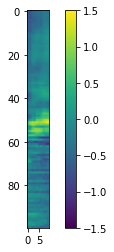

date:180327, rec:001, time:4120.0, label:0.0


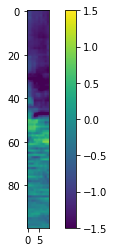

date:180322, rec:007, time:3579.0, label:0.0


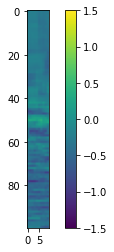

date:180327, rec:002, time:3911.0, label:0.0


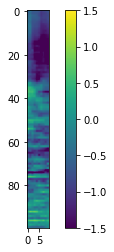

date:180330, rec:005, time:5500.0, label:1.0
date:180410, rec:003, time:3260.0, label:1.0
date:180327, rec:007, time:4180.0, label:0.0


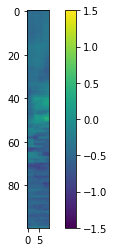

date:180325, rec:007, time:4893.0, label:0.0


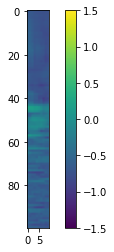

date:180323, rec:003, time:787.0, label:1.0
date:180330, rec:008, time:1131.0, label:0.0


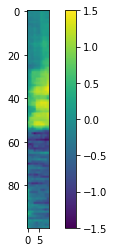

date:180327, rec:007, time:2940.0, label:0.0


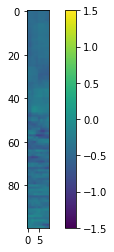

date:180327, rec:001, time:220.0, label:0.0


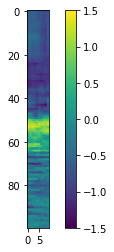

date:180401, rec:001, time:5893.0, label:1.0
date:180324, rec:009, time:570.0, label:0.0


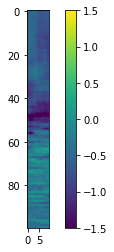

date:180330, rec:006, time:4812.0, label:1.0
date:180331, rec:007, time:4847.0, label:0.0


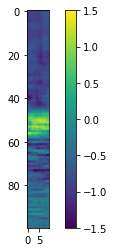

date:180331, rec:001, time:3224.0, label:1.0
date:180325, rec:007, time:6233.0, label:0.0


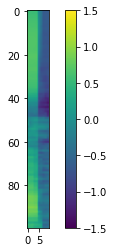

date:180410, rec:006, time:6800.0, label:0.0


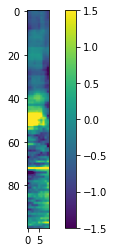

date:180327, rec:007, time:1200.0, label:0.0


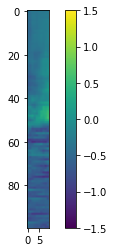

date:180331, rec:005, time:3347.0, label:1.0
date:180331, rec:003, time:3488.0, label:1.0
date:180331, rec:007, time:5888.0, label:0.0


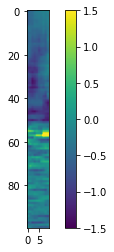

date:180330, rec:001, time:5835.0, label:1.0
date:180329, rec:003, time:2224.0, label:1.0
date:180331, rec:007, time:3537.0, label:0.0


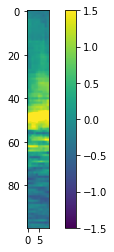

date:180331, rec:003, time:5858.0, label:1.0
date:180401, rec:001, time:1760.0, label:0.0


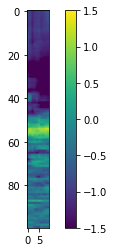

date:180327, rec:007, time:3550.0, label:0.0


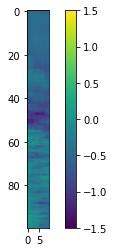

date:180324, rec:004, time:3942.0, label:1.0
date:180323, rec:007, time:6131.0, label:0.0


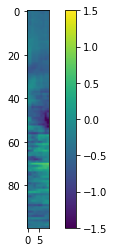

date:180327, rec:007, time:3440.0, label:0.0


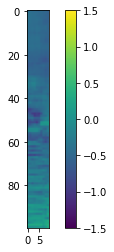

date:180327, rec:007, time:4991.0, label:0.0


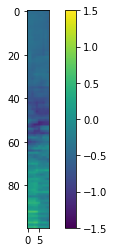

date:180330, rec:006, time:1632.0, label:0.0


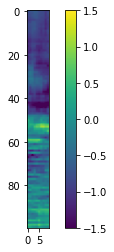

date:180327, rec:008, time:4693.0, label:0.0


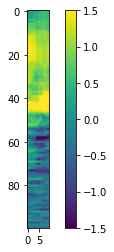

date:180331, rec:007, time:2327.0, label:0.0


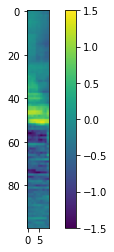

date:180410, rec:002, time:70.0, label:1.0
date:180327, rec:005, time:4190.0, label:1.0
date:180325, rec:007, time:940.0, label:1.0
date:180330, rec:008, time:5625.0, label:0.0


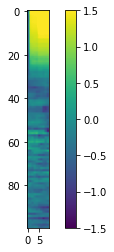

date:180324, rec:008, time:521.0, label:1.0
date:180324, rec:008, time:6054.0, label:0.0


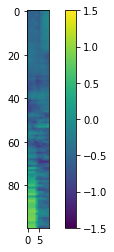

date:180410, rec:003, time:5038.0, label:1.0
date:180325, rec:009, time:700.0, label:0.0


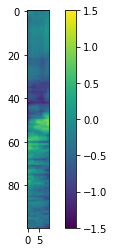

date:180324, rec:008, time:1141.0, label:0.0


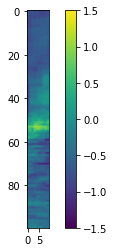

date:180323, rec:002, time:2056.0, label:1.0
date:180410, rec:006, time:2876.0, label:1.0
date:180325, rec:007, time:1344.0, label:1.0
date:180327, rec:007, time:6801.0, label:0.0


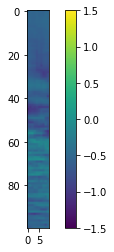

date:180322, rec:007, time:2123.0, label:0.0


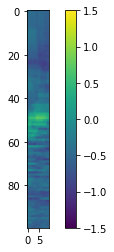

date:180327, rec:004, time:3915.0, label:1.0
date:180331, rec:001, time:6147.0, label:1.0
date:180325, rec:001, time:20.0, label:0.0


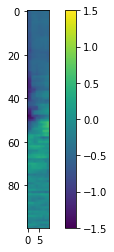

date:180410, rec:004, time:1298.0, label:1.0
date:180329, rec:001, time:5012.0, label:1.0
date:180330, rec:008, time:1061.0, label:0.0


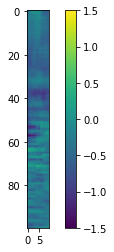

date:180325, rec:007, time:4803.0, label:0.0


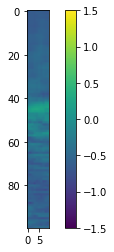

date:180330, rec:009, time:1954.0, label:0.0


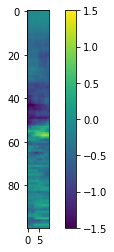

date:180325, rec:001, time:900.0, label:0.0


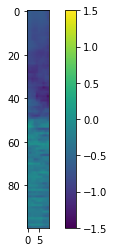

date:180331, rec:007, time:6238.0, label:0.0


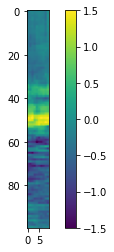

date:180401, rec:001, time:5307.0, label:0.0


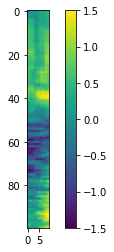

date:180323, rec:007, time:2835.0, label:0.0


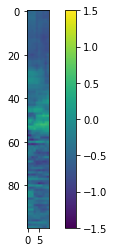

date:180327, rec:001, time:6852.0, label:0.0


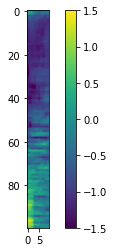

date:180330, rec:004, time:1287.0, label:1.0
date:180325, rec:004, time:80.0, label:1.0
date:180327, rec:004, time:2774.0, label:0.0


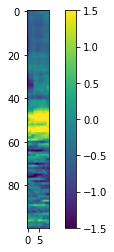

date:180325, rec:004, time:2498.0, label:1.0
date:180331, rec:007, time:3317.0, label:0.0


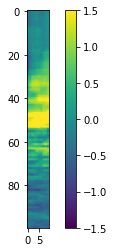

date:180329, rec:002, time:3792.0, label:1.0
date:180324, rec:008, time:6064.0, label:0.0


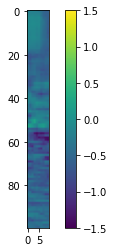

date:180410, rec:004, time:6382.0, label:1.0
date:180327, rec:004, time:2584.0, label:0.0


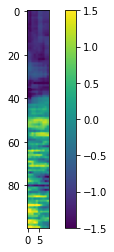

date:180325, rec:003, time:2265.0, label:1.0
date:180324, rec:008, time:311.0, label:1.0
date:180327, rec:008, time:4022.0, label:0.0


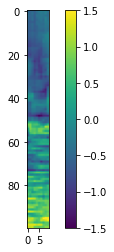

date:180327, rec:004, time:2834.0, label:0.0


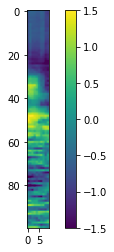

date:180327, rec:001, time:2100.0, label:0.0


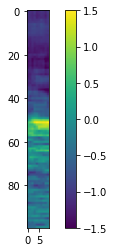

date:180324, rec:008, time:6754.0, label:0.0


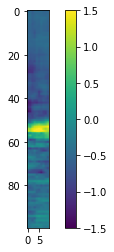

date:180325, rec:001, time:600.0, label:0.0


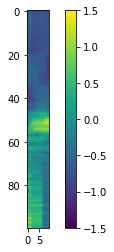

date:180330, rec:005, time:1476.0, label:1.0
date:180323, rec:007, time:5641.0, label:0.0


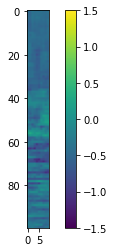

date:180327, rec:002, time:6795.0, label:1.0
date:180330, rec:009, time:5821.0, label:0.0


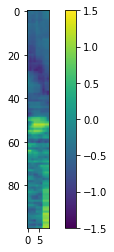

date:180330, rec:009, time:2194.0, label:0.0


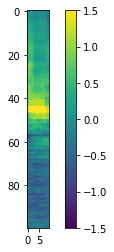

date:180322, rec:007, time:4090.0, label:0.0


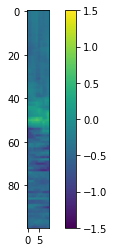

date:180331, rec:004, time:5597.0, label:1.0
date:180401, rec:001, time:290.0, label:0.0


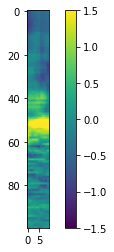

date:180324, rec:006, time:4645.0, label:0.0


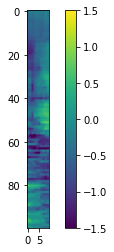

date:180330, rec:009, time:1464.0, label:0.0


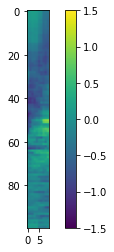

date:180323, rec:005, time:2327.0, label:1.0
date:180327, rec:007, time:4200.0, label:0.0


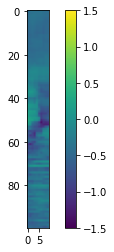

date:180329, rec:001, time:3261.0, label:1.0
date:180325, rec:007, time:6293.0, label:0.0


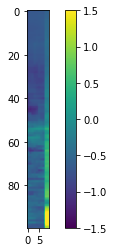

date:180401, rec:001, time:1080.0, label:0.0


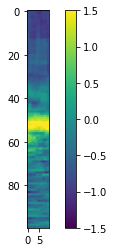

date:180324, rec:008, time:3413.0, label:0.0


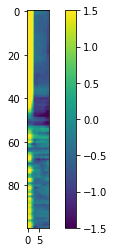

date:180327, rec:008, time:1872.0, label:0.0


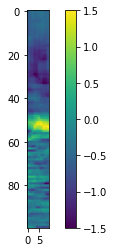

date:180410, rec:005, time:4947.0, label:1.0
date:180323, rec:005, time:2267.0, label:1.0
date:180329, rec:006, time:5111.0, label:1.0
date:180324, rec:001, time:610.0, label:0.0


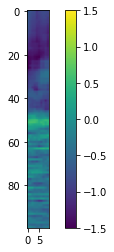

date:180324, rec:004, time:5479.0, label:1.0
date:180324, rec:004, time:2199.0, label:1.0
date:180331, rec:003, time:5288.0, label:1.0
date:180327, rec:004, time:1816.0, label:1.0
date:180327, rec:005, time:2273.0, label:0.0


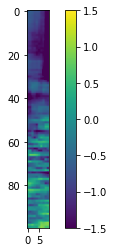

date:180322, rec:005, time:370.0, label:1.0
date:180331, rec:003, time:5168.0, label:1.0
date:180323, rec:003, time:4010.0, label:1.0
date:180325, rec:009, time:4509.0, label:0.0


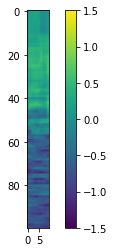

date:180410, rec:004, time:1128.0, label:1.0
date:180330, rec:003, time:2787.0, label:1.0
date:180324, rec:008, time:1951.0, label:0.0


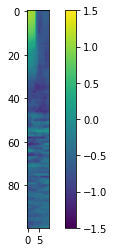

date:180323, rec:004, time:4129.0, label:1.0
date:180410, rec:004, time:2148.0, label:1.0
date:180327, rec:008, time:2272.0, label:0.0


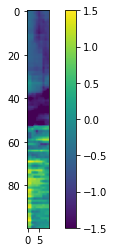

date:180327, rec:006, time:70.0, label:1.0


In [32]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [34]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [0]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 2
timewindow = 10



Train loss for epoch 0: 0.5037945508956909
Val loss for epoch 0: 0.4599480926990509
Train loss for epoch 1: 0.4855852425098419
Val loss for epoch 1: 0.4530104398727417
1
Train loss for epoch 2: 0.4767668545246124
Val loss for epoch 2: 0.41051071882247925
2
Train loss for epoch 3: 0.47185152769088745
Val loss for epoch 3: 0.41312775015830994
Train loss for epoch 4: 0.46766752004623413
Val loss for epoch 4: 0.4031025171279907
4
Train loss for epoch 5: 0.4656675159931183
Val loss for epoch 5: 0.40317726135253906
Train loss for epoch 6: 0.4635857045650482
Val loss for epoch 6: 0.41517844796180725
Train loss for epoch 7: 0.4623425006866455
Val loss for epoch 7: 0.3596017360687256
7
Train loss for epoch 8: 0.46144965291023254
Val loss for epoch 8: 0.4016772508621216
Train loss for epoch 9: 0.4610215425491333
Val loss for epoch 9: 0.3713303208351135
Train loss for epoch 10: 0.45965683460235596
Val loss for epoch 10: 0.3680768609046936
Train loss for epoch 11: 0.45979201793670654
Val loss for 

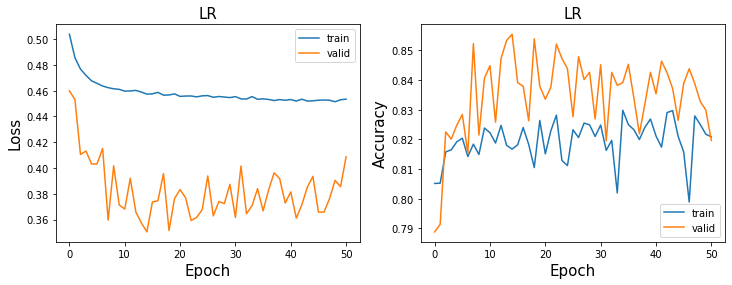

Train loss for epoch 0: 0.5020164251327515
Val loss for epoch 0: 0.45251816511154175
Train loss for epoch 1: 0.48335644602775574
Val loss for epoch 1: 0.4075224697589874
1
Train loss for epoch 2: 0.4778114855289459
Val loss for epoch 2: 0.39941927790641785
2
Train loss for epoch 3: 0.471571683883667
Val loss for epoch 3: 0.4040612578392029
Train loss for epoch 4: 0.4697178304195404
Val loss for epoch 4: 0.3894244134426117
4
Train loss for epoch 5: 0.4658006727695465
Val loss for epoch 5: 0.39547213912010193
Train loss for epoch 6: 0.4639960527420044
Val loss for epoch 6: 0.41165539622306824
Train loss for epoch 7: 0.4622214734554291
Val loss for epoch 7: 0.3595811426639557
7
Train loss for epoch 8: 0.461513489484787
Val loss for epoch 8: 0.37115275859832764
Train loss for epoch 9: 0.4601838290691376
Val loss for epoch 9: 0.3571914732456207
9
Train loss for epoch 10: 0.45996809005737305
Val loss for epoch 10: 0.3789568543434143
Train loss for epoch 11: 0.45917457342147827
Val loss for e

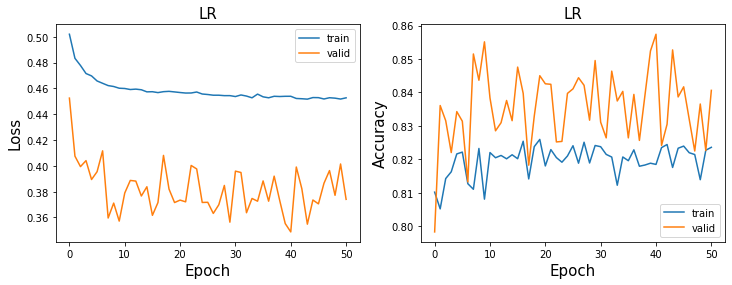

Train loss for epoch 0: 0.500705897808075
Val loss for epoch 0: 0.44064149260520935
Train loss for epoch 1: 0.4829472601413727
Val loss for epoch 1: 0.43537306785583496
1
Train loss for epoch 2: 0.4759347438812256
Val loss for epoch 2: 0.41560882329940796
2
Train loss for epoch 3: 0.4719902575016022
Val loss for epoch 3: 0.4018386900424957
3
Train loss for epoch 4: 0.4673878252506256
Val loss for epoch 4: 0.4147784411907196
Train loss for epoch 5: 0.4651147723197937
Val loss for epoch 5: 0.3632409870624542
5
Train loss for epoch 6: 0.4649633467197418
Val loss for epoch 6: 0.3862541615962982
Train loss for epoch 7: 0.46313896775245667
Val loss for epoch 7: 0.3727487325668335
Train loss for epoch 8: 0.46095970273017883
Val loss for epoch 8: 0.3842022716999054
Train loss for epoch 9: 0.46154844760894775
Val loss for epoch 9: 0.41261622309684753
Train loss for epoch 10: 0.46153026819229126
Val loss for epoch 10: 0.38310936093330383
Train loss for epoch 11: 0.46051353216171265
Val loss for 

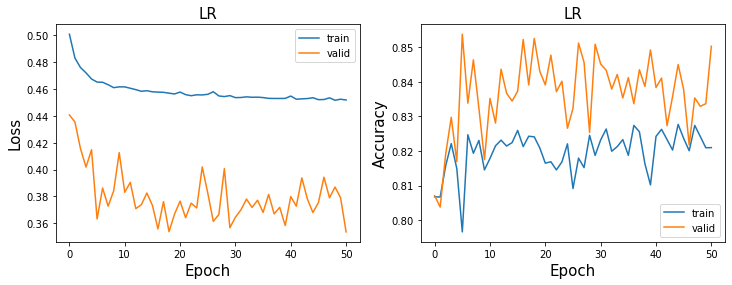

Train loss for epoch 0: 0.5015160441398621
Val loss for epoch 0: 0.4512307643890381
Train loss for epoch 1: 0.48415887355804443
Val loss for epoch 1: 0.4232403337955475
1
Train loss for epoch 2: 0.4766828119754791
Val loss for epoch 2: 0.42120227217674255
2
Train loss for epoch 3: 0.4710816442966461
Val loss for epoch 3: 0.40998998284339905
3
Train loss for epoch 4: 0.4682541787624359
Val loss for epoch 4: 0.4013824462890625
4
Train loss for epoch 5: 0.46580222249031067
Val loss for epoch 5: 0.3810631036758423
5
Train loss for epoch 6: 0.4659216105937958
Val loss for epoch 6: 0.3619235157966614
6
Train loss for epoch 7: 0.4656669497489929
Val loss for epoch 7: 0.3826824426651001
Train loss for epoch 8: 0.46190035343170166
Val loss for epoch 8: 0.38428211212158203
Train loss for epoch 9: 0.4606398344039917
Val loss for epoch 9: 0.3901960849761963
Train loss for epoch 10: 0.45979392528533936
Val loss for epoch 10: 0.376002699136734
Train loss for epoch 11: 0.4592078924179077
Val loss for

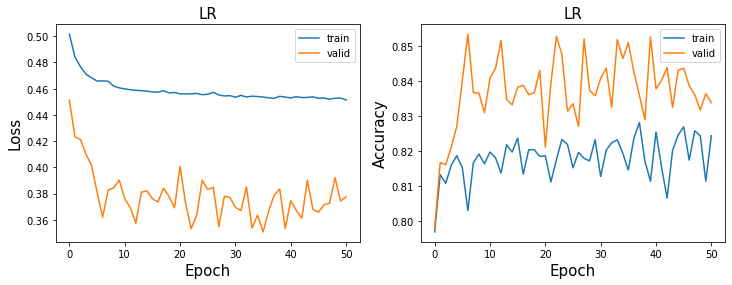

In [16]:
for alpha in alphas:
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [35]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH2_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
0         14


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGnone0_EPOCH14_REDUCEsum.pt


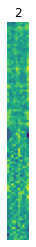

train loss:0.4673217535018921 accuracy:0.8150544959128065
0.5


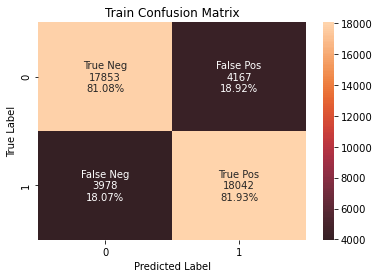

validation loss:0.3503875732421875 accuracy:0.8554380664652568
0.82613295


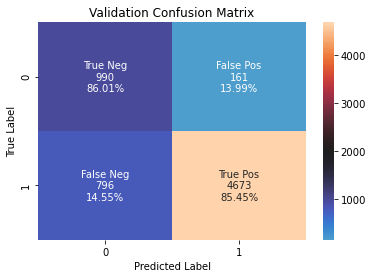

test loss:0.4422076642513275 accuracy:0.8002934463645256
0.74029994


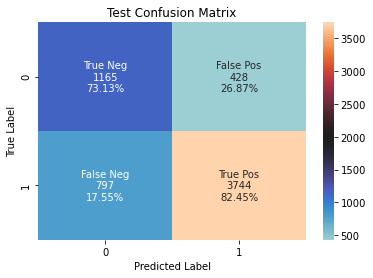

date:180414, rec:004, time:6095.0, label:1.0
Original data 62 CH


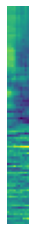

In [36]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix -Validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))

    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    


### Logistic regression with L2 regularization

In [43]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'




Train loss for epoch 0: 0.5016400814056396
Val loss for epoch 0: 0.42437461018562317
Train loss for epoch 1: 0.48406562209129333
Val loss for epoch 1: 0.41876018047332764
1
Train loss for epoch 2: 0.4761604368686676
Val loss for epoch 2: 0.4073530435562134
2
Train loss for epoch 3: 0.4724613428115845
Val loss for epoch 3: 0.4041093587875366
3
Train loss for epoch 4: 0.46774688363075256
Val loss for epoch 4: 0.40033119916915894
4
Train loss for epoch 5: 0.4649118185043335
Val loss for epoch 5: 0.4018455147743225
Train loss for epoch 6: 0.4633365571498871
Val loss for epoch 6: 0.391566663980484
6
Train loss for epoch 7: 0.46251413226127625
Val loss for epoch 7: 0.38002172112464905
7
Train loss for epoch 8: 0.46101200580596924
Val loss for epoch 8: 0.4006005525588989
Train loss for epoch 9: 0.4606625735759735
Val loss for epoch 9: 0.3799276053905487
9
Train loss for epoch 10: 0.4600922167301178
Val loss for epoch 10: 0.36022868752479553
10
Train loss for epoch 11: 0.45919665694236755
Val 

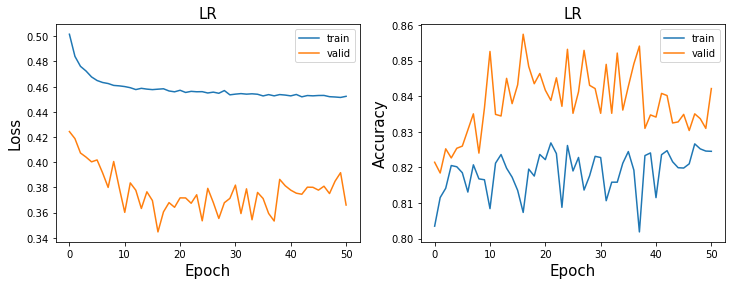

Train loss for epoch 0: 0.5037060379981995
Val loss for epoch 0: 0.451314240694046
Train loss for epoch 1: 0.4861978590488434
Val loss for epoch 1: 0.43033120036125183
1
Train loss for epoch 2: 0.4778675436973572
Val loss for epoch 2: 0.40542206168174744
2
Train loss for epoch 3: 0.47494181990623474
Val loss for epoch 3: 0.3960537910461426
3
Train loss for epoch 4: 0.4729231297969818
Val loss for epoch 4: 0.3931788206100464
4
Train loss for epoch 5: 0.4689672291278839
Val loss for epoch 5: 0.39268210530281067
5
Train loss for epoch 6: 0.46824026107788086
Val loss for epoch 6: 0.37295296788215637
6
Train loss for epoch 7: 0.466937780380249
Val loss for epoch 7: 0.3867473006248474
Train loss for epoch 8: 0.4657624363899231
Val loss for epoch 8: 0.3828130066394806
Train loss for epoch 9: 0.4653710424900055
Val loss for epoch 9: 0.37900668382644653
Train loss for epoch 10: 0.46415796875953674
Val loss for epoch 10: 0.3487107455730438
10
Train loss for epoch 11: 0.4651155173778534
Val loss 

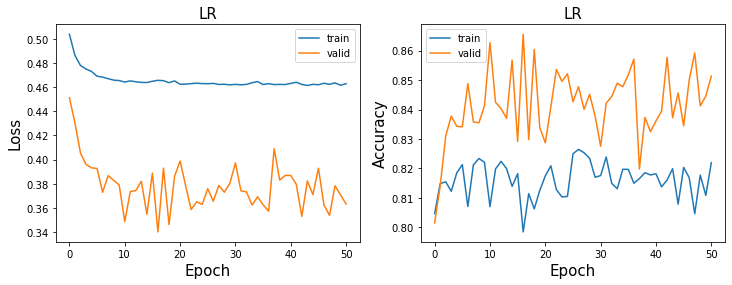

Train loss for epoch 0: 0.5674703121185303
Val loss for epoch 0: 0.5057477951049805
Train loss for epoch 1: 0.5340687036514282
Val loss for epoch 1: 0.4657428562641144
1
Train loss for epoch 2: 0.5295040011405945
Val loss for epoch 2: 0.45714130997657776
2
Train loss for epoch 3: 0.5274447798728943
Val loss for epoch 3: 0.45121997594833374
3
Train loss for epoch 4: 0.5270472764968872
Val loss for epoch 4: 0.442371666431427
4
Train loss for epoch 5: 0.5252458453178406
Val loss for epoch 5: 0.4234805107116699
5
Train loss for epoch 6: 0.5247641205787659
Val loss for epoch 6: 0.4256020188331604
Train loss for epoch 7: 0.5240849852561951
Val loss for epoch 7: 0.42663127183914185
Train loss for epoch 8: 0.5256766676902771
Val loss for epoch 8: 0.4337717592716217
Train loss for epoch 9: 0.526461660861969
Val loss for epoch 9: 0.4151962697505951
9
Train loss for epoch 10: 0.5262880921363831
Val loss for epoch 10: 0.4351532757282257
Train loss for epoch 11: 0.5238622426986694
Val loss for epoc

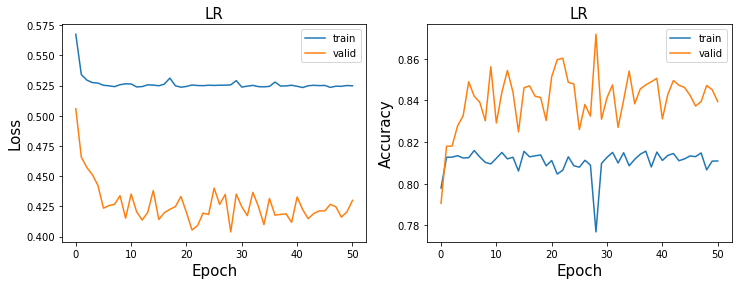

Train loss for epoch 0: 0.6020054221153259
Val loss for epoch 0: 0.5181772708892822
Train loss for epoch 1: 0.5664461255073547
Val loss for epoch 1: 0.5030470490455627
1
Train loss for epoch 2: 0.5633264183998108
Val loss for epoch 2: 0.4888990819454193
2
Train loss for epoch 3: 0.5604982972145081
Val loss for epoch 3: 0.48001810908317566
3
Train loss for epoch 4: 0.5590276718139648
Val loss for epoch 4: 0.47729092836380005
4
Train loss for epoch 5: 0.560323178768158
Val loss for epoch 5: 0.46630358695983887
5
Train loss for epoch 6: 0.557180643081665
Val loss for epoch 6: 0.4646286070346832
6
Train loss for epoch 7: 0.5622646808624268
Val loss for epoch 7: 0.46324512362480164
7
Train loss for epoch 8: 0.5584942102432251
Val loss for epoch 8: 0.4634898602962494
Train loss for epoch 9: 0.5573537945747375
Val loss for epoch 9: 0.4578629434108734
9
Train loss for epoch 10: 0.5574496984481812
Val loss for epoch 10: 0.45784980058670044
10
Train loss for epoch 11: 0.5574794411659241
Val loss

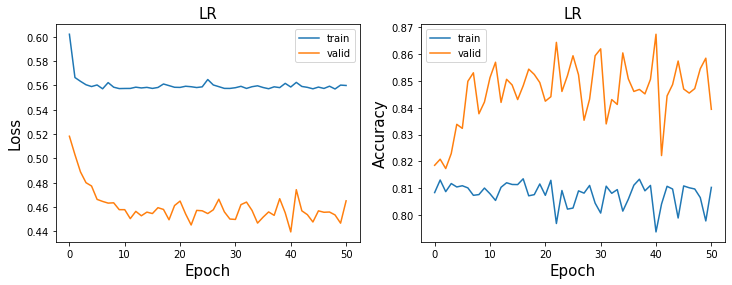

In [20]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [44]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH2_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         16
50        28
100       40


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGl21_EPOCH16_REDUCEsum.pt


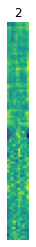

train loss:0.48242148756980896 accuracy:0.7948683015440509
0.5


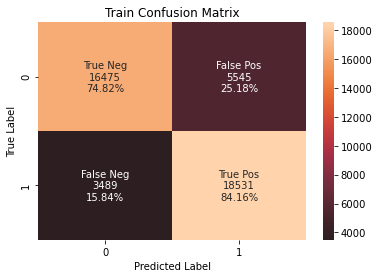

validation loss:0.3401873707771301 accuracy:0.8655589123867069
0.82613295


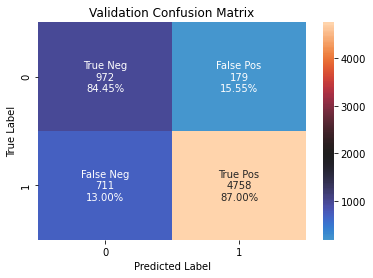

test loss:0.4392634332180023 accuracy:0.8048581675904793
0.74029994


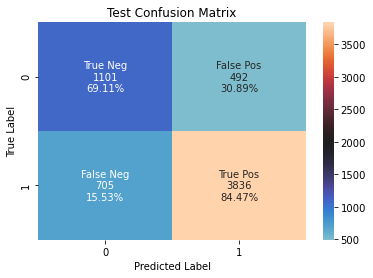

date:180414, rec:004, time:6095.0, label:1.0
Original data 62 CH


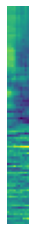

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGl250_EPOCH28_REDUCEsum.pt


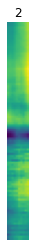

train loss:0.542231023311615 accuracy:0.7806539509536785
0.5


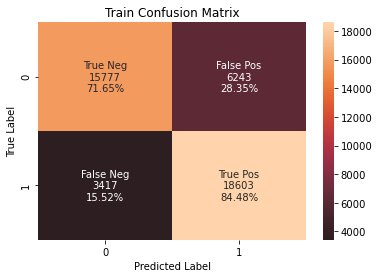

validation loss:0.4038071036338806 accuracy:0.8717522658610272
0.82613295


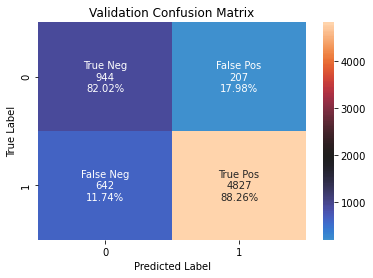

test loss:0.4776589870452881 accuracy:0.8175741767199217
0.74029994


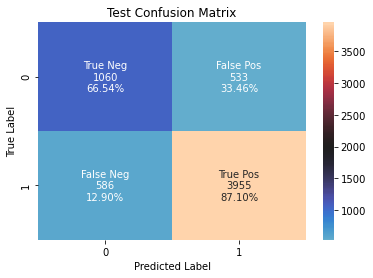

date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


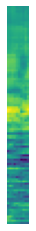

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGl2100_EPOCH40_REDUCEsum.pt


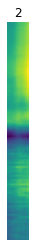

train loss:0.5637486577033997 accuracy:0.797683923705722
0.5


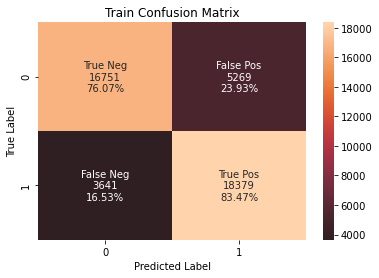

validation loss:0.43957093358039856 accuracy:0.8673716012084592
0.82613295


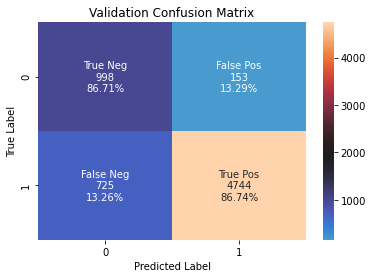

test loss:0.5068602561950684 accuracy:0.818063253994131
0.74029994


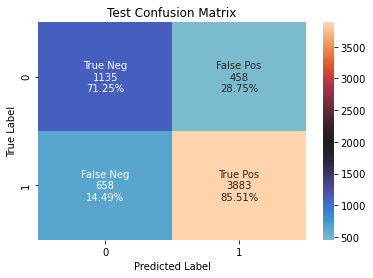

date:180414, rec:005, time:4609.0, label:1.0
Original data 62 CH


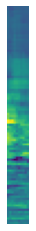

In [45]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix -Validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))

    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    


### Logistic Regression with finite difference regularization

In [46]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 10



Train loss for epoch 0: 0.4986821413040161
Val loss for epoch 0: 0.4538482427597046
Train loss for epoch 1: 0.4835069179534912
Val loss for epoch 1: 0.4069889187812805
1
Train loss for epoch 2: 0.47647625207901
Val loss for epoch 2: 0.41061368584632874
Train loss for epoch 3: 0.47074654698371887
Val loss for epoch 3: 0.36789047718048096
3
Train loss for epoch 4: 0.4687964618206024
Val loss for epoch 4: 0.37287256121635437
Train loss for epoch 5: 0.46576935052871704
Val loss for epoch 5: 0.38926801085472107
Train loss for epoch 6: 0.4645157754421234
Val loss for epoch 6: 0.3695378303527832
Train loss for epoch 7: 0.46279868483543396
Val loss for epoch 7: 0.36175107955932617
7
Train loss for epoch 8: 0.46168410778045654
Val loss for epoch 8: 0.39877089858055115
Train loss for epoch 9: 0.4605056643486023
Val loss for epoch 9: 0.3728562593460083
Train loss for epoch 10: 0.45946645736694336
Val loss for epoch 10: 0.3877668082714081
Train loss for epoch 11: 0.4601801931858063
Val loss for ep

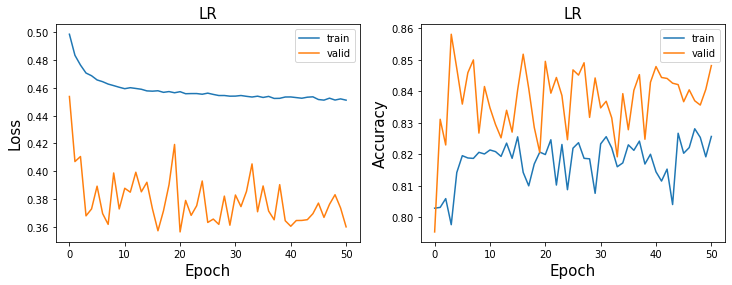

Train loss for epoch 0: 0.5084125995635986
Val loss for epoch 0: 0.4407216012477875
Train loss for epoch 1: 0.4897906482219696
Val loss for epoch 1: 0.4294850528240204
1
Train loss for epoch 2: 0.4821721911430359
Val loss for epoch 2: 0.394165575504303
2
Train loss for epoch 3: 0.4765153229236603
Val loss for epoch 3: 0.40533149242401123
Train loss for epoch 4: 0.4743230938911438
Val loss for epoch 4: 0.395147442817688
Train loss for epoch 5: 0.4716212749481201
Val loss for epoch 5: 0.3895493149757385
5
Train loss for epoch 6: 0.4697665274143219
Val loss for epoch 6: 0.36459165811538696
6
Train loss for epoch 7: 0.47031497955322266
Val loss for epoch 7: 0.40148380398750305
Train loss for epoch 8: 0.468699187040329
Val loss for epoch 8: 0.379375159740448
Train loss for epoch 9: 0.46855565905570984
Val loss for epoch 9: 0.3775230646133423
Train loss for epoch 10: 0.4682590067386627
Val loss for epoch 10: 0.38710442185401917
Train loss for epoch 11: 0.46867361664772034
Val loss for epoch 

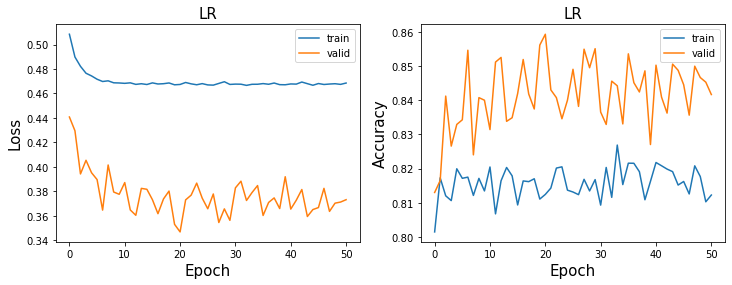

Train loss for epoch 0: 0.5664622783660889
Val loss for epoch 0: 0.4593846797943115
Train loss for epoch 1: 0.5070010423660278
Val loss for epoch 1: 0.42257755994796753
1
Train loss for epoch 2: 0.5035735964775085
Val loss for epoch 2: 0.4544384777545929
Train loss for epoch 3: 0.4997647702693939
Val loss for epoch 3: 0.42110148072242737
3
Train loss for epoch 4: 0.49741265177726746
Val loss for epoch 4: 0.41513198614120483
4
Train loss for epoch 5: 0.4969818890094757
Val loss for epoch 5: 0.42468374967575073
Train loss for epoch 6: 0.49664947390556335
Val loss for epoch 6: 0.3947889804840088
6
Train loss for epoch 7: 0.49569934606552124
Val loss for epoch 7: 0.4087125062942505
Train loss for epoch 8: 0.49507027864456177
Val loss for epoch 8: 0.3985344469547272
Train loss for epoch 9: 0.49505728483200073
Val loss for epoch 9: 0.3797459900379181
9
Train loss for epoch 10: 0.4956262707710266
Val loss for epoch 10: 0.4148178994655609
Train loss for epoch 11: 0.49493858218193054
Val loss f

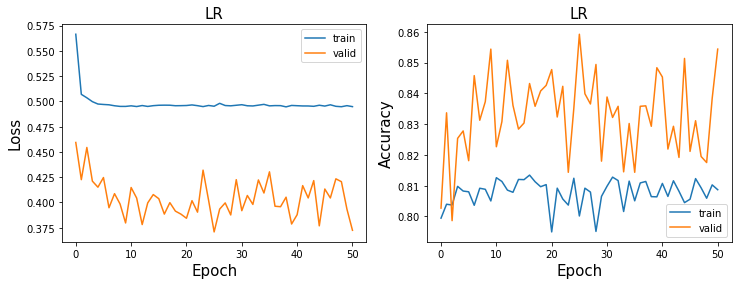

Train loss for epoch 0: 0.6012825965881348
Val loss for epoch 0: 0.48849213123321533
Train loss for epoch 1: 0.5183424949645996
Val loss for epoch 1: 0.45714232325553894
1
Train loss for epoch 2: 0.515051007270813
Val loss for epoch 2: 0.4737622141838074
Train loss for epoch 3: 0.5120137333869934
Val loss for epoch 3: 0.43133386969566345
3
Train loss for epoch 4: 0.5114105939865112
Val loss for epoch 4: 0.4250677525997162
4
Train loss for epoch 5: 0.5091554522514343
Val loss for epoch 5: 0.4465932250022888
Train loss for epoch 6: 0.5083852410316467
Val loss for epoch 6: 0.40755921602249146
6
Train loss for epoch 7: 0.5091694593429565
Val loss for epoch 7: 0.4520444869995117
Train loss for epoch 8: 0.5085687637329102
Val loss for epoch 8: 0.417411744594574
Train loss for epoch 9: 0.5068881511688232
Val loss for epoch 9: 0.42222777009010315
Train loss for epoch 10: 0.5075607299804688
Val loss for epoch 10: 0.39847564697265625
10
Train loss for epoch 11: 0.5074310302734375
Val loss for ep

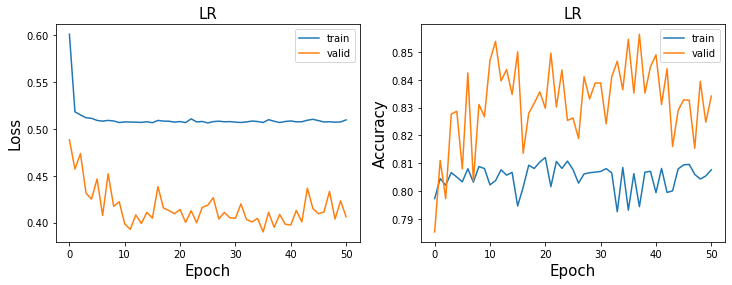

In [24]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [47]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH2_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)

       epoch
alpha       
1         20
50        25
100       35


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGfinite_diff1_EPOCH20_REDUCEsum.pt


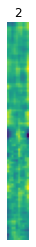

train loss:0.47530946135520935 accuracy:0.8108764759309719
0.5


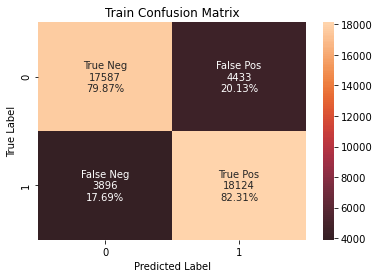

validation loss:0.34674689173698425 accuracy:0.8593655589123868
0.82613295


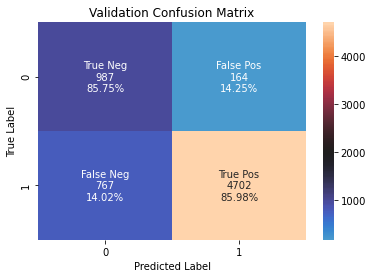

test loss:0.43721190094947815 accuracy:0.806488425171177
0.74029994


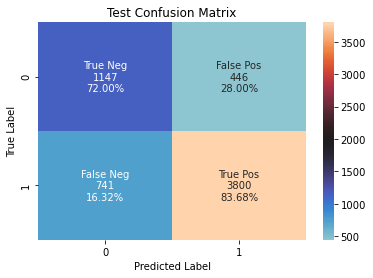

date:180414, rec:004, time:6095.0, label:1.0
Original data 62 CH


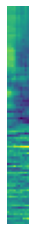

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGfinite_diff50_EPOCH25_REDUCEsum.pt


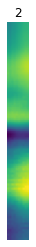

train loss:0.4975520372390747 accuracy:0.8072661217075386
0.5


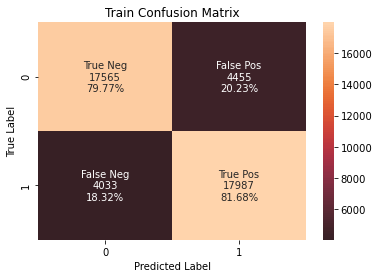

validation loss:0.37087348103523254 accuracy:0.859214501510574
0.82613295


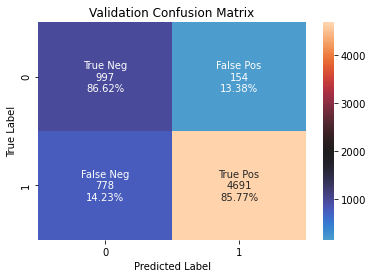

test loss:0.4532856345176697 accuracy:0.8066514509292468
0.74029994


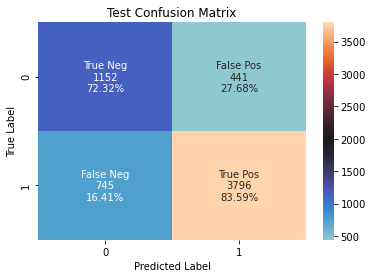

date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


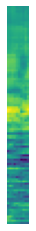

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH2_LOSSbce_REGfinite_diff100_EPOCH35_REDUCEsum.pt


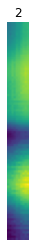

train loss:0.5159635543823242 accuracy:0.7998637602179837
0.5


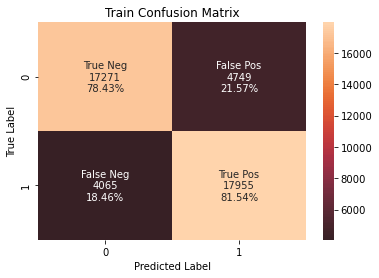

validation loss:0.38997820019721985 accuracy:0.8545317220543807
0.82613295


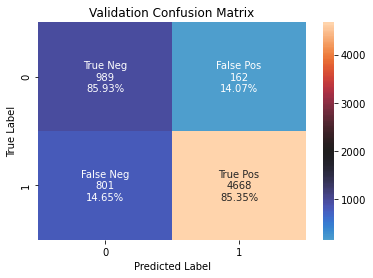

test loss:0.47190171480178833 accuracy:0.8009455493968047
0.74029994


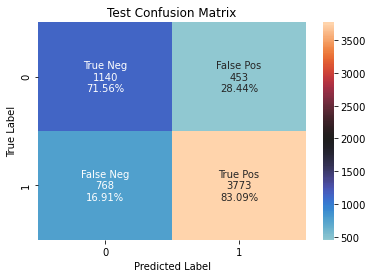

date:180414, rec:005, time:2563.0, label:1.0
Original data 62 CH


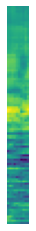

In [48]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
        ## Confusion matrix -Train
    train_loss, train_acc, train_preds, train_preds_probs, train_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('train loss:{} accuracy:{}'.format(train_loss, train_acc))
    print(np.mean(np.concatenate(train_labels)))

    predictions_train = np.concatenate(train_preds)
    labels_train = np.concatenate(train_labels)

    df_train = pd.DataFrame({'predictions': predictions_train, 'labels': labels_train})

    cm_train = confusion_matrix(labels_train, predictions_train)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_train.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_train, annot=labels, fmt='', center = 2000)
    ax.set_title('Train Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix -Validation
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Confusion matrix -Validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))

    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}_REDUCEsum.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    
    


### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

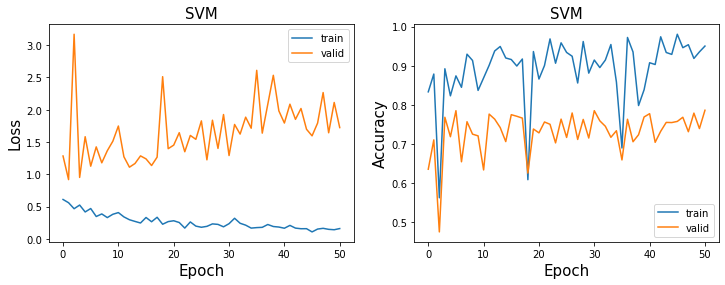

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

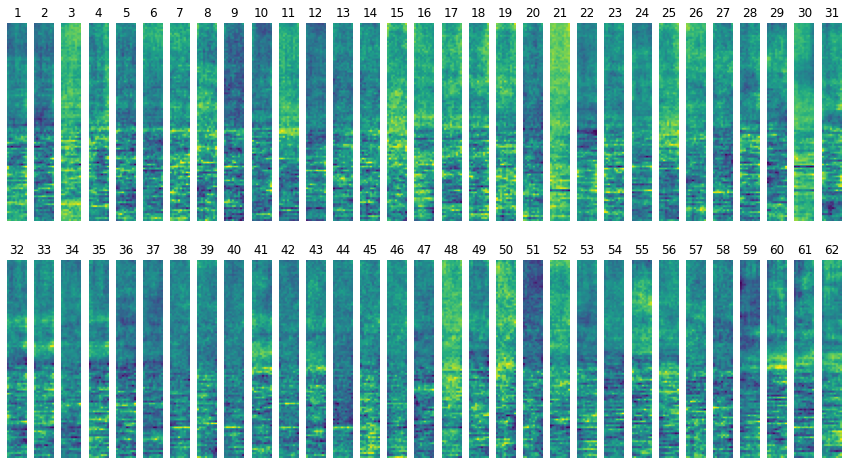

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


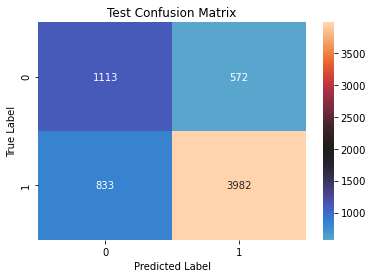

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


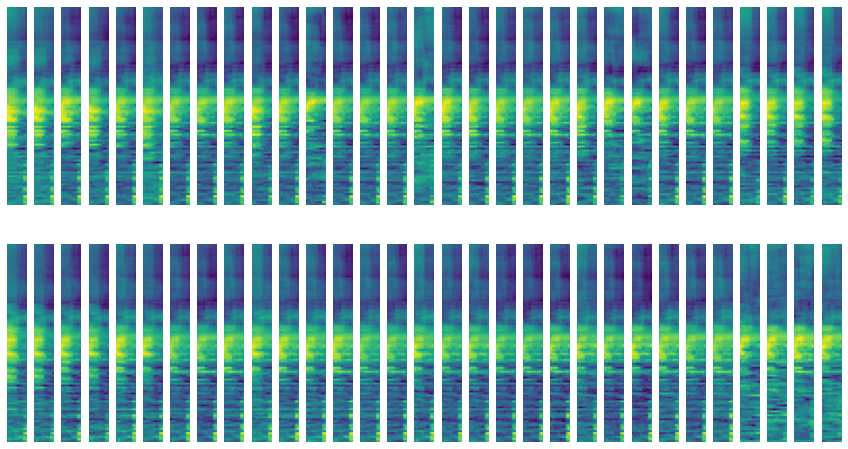

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

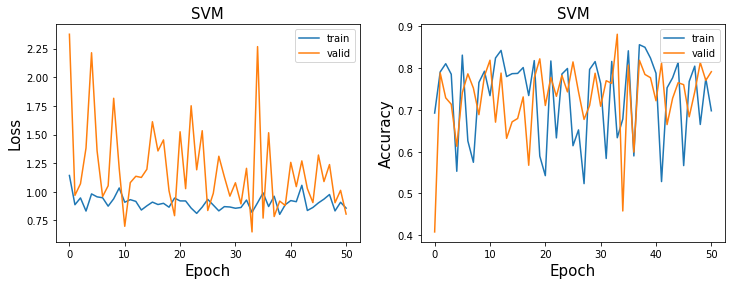

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

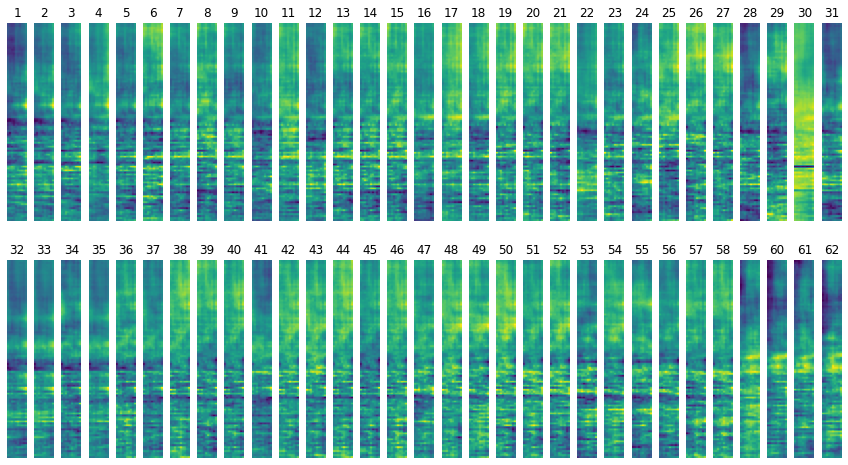

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


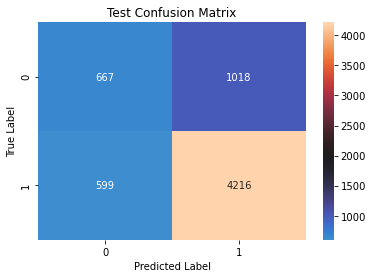

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


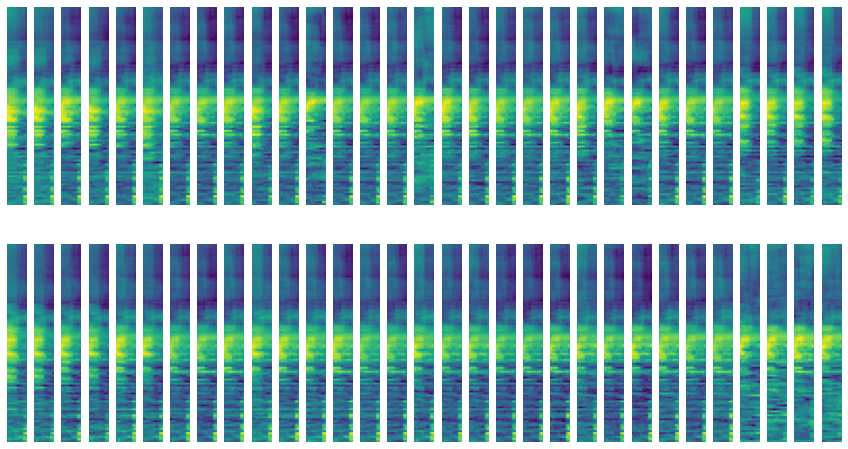

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

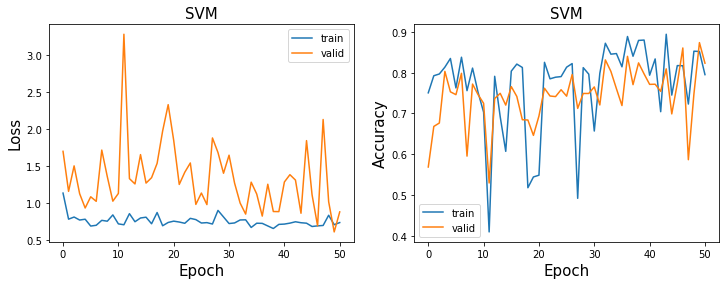

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

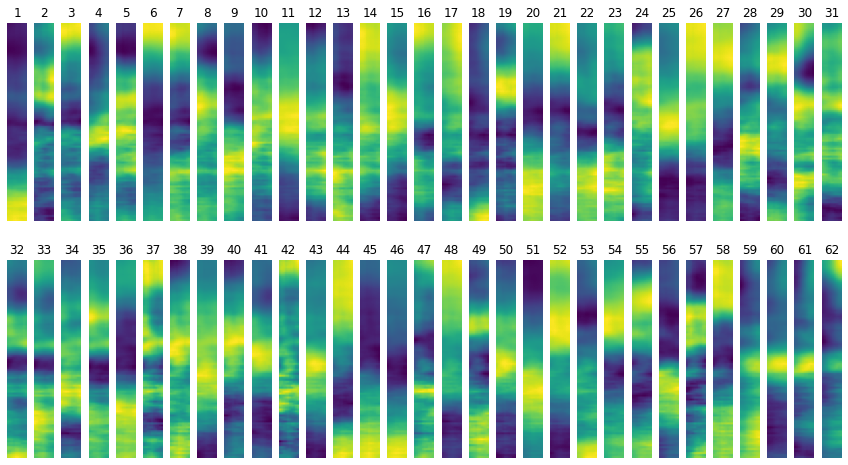

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


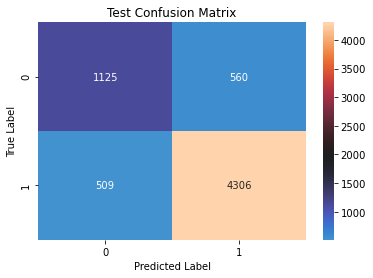

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


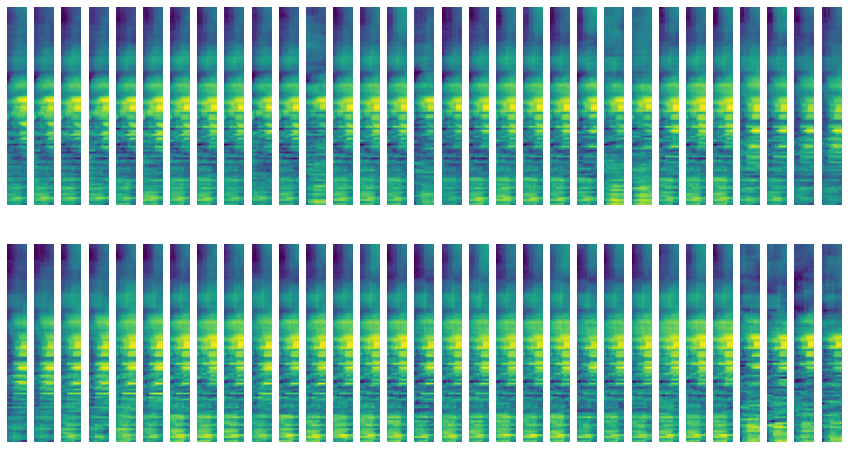

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()